In [1]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import joblib

In [2]:
# Load the dataset
file_path = 'processed_autism_screening.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Analyze the data based on the 'class' column
# 0 = No ASD traits
# 1 = ASD traits

# Count the number of each class
class_counts = df['class'].value_counts()

# Calculate the percentage for each class
class_percentages = df['class'].value_counts(normalize=True) * 100

# Prepare the analysis result
analysis_result = {
    "Number of children without ASD traits": class_counts[0],
    "Number of children with ASD traits": class_counts[1],
    "Percentage of children without ASD traits (%)": class_percentages[0],
    "Percentage of children with ASD traits (%)": class_percentages[1]
}

# Display the result
print(analysis_result)


{'Number of children without ASD traits': 2342, 'Number of children with ASD traits': 2707, 'Percentage of children without ASD traits (%)': 46.3854228560111, 'Percentage of children with ASD traits (%)': 53.6145771439889}


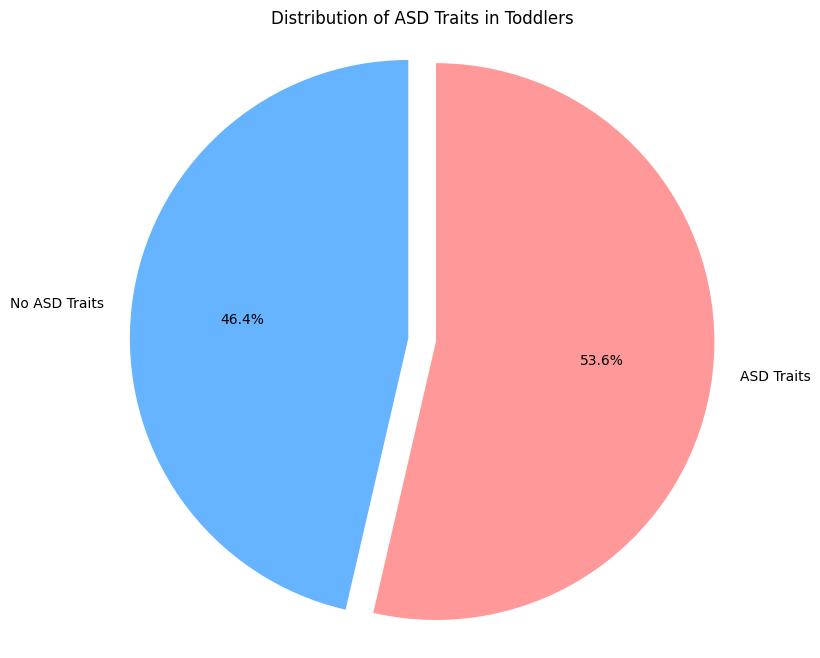

In [3]:
# Labels for the pie chart
labels = ['No ASD Traits', 'ASD Traits']

# Sizes for each slice
sizes = [2342, 2707]  # Replace with your actual counts

# Colors (optional)
colors = ['#66b3ff', '#ff9999']

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Distribution of ASD Traits in Toddlers')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.show()


In [4]:
# Step 3: Prepare the data
X = df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']]
y = df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
model_results = {}


In [5]:
# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluate Logistic Regression
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
model_results['Logistic Regression'] = logistic_accuracy

print(f"Logistic Regression Accuracy: {logistic_accuracy:.4f}")
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       464
           1       1.00      1.00      1.00       546

    accuracy                           1.00      1010
   macro avg       1.00      1.00      1.00      1010
weighted avg       1.00      1.00      1.00      1010



In [6]:
# Random Forest Classifier Model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
model_results['Random Forest'] = rf_accuracy

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9881
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       464
           1       0.99      0.99      0.99       546

    accuracy                           0.99      1010
   macro avg       0.99      0.99      0.99      1010
weighted avg       0.99      0.99      0.99      1010



In [7]:
# Decision Tree Classifier Model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
model_results['Decision Tree'] = dt_accuracy

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9891
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       464
           1       1.00      0.98      0.99       546

    accuracy                           0.99      1010
   macro avg       0.99      0.99      0.99      1010
weighted avg       0.99      0.99      0.99      1010



In [8]:
# Support Vector Machine (SVM) Model
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
model_results['Support Vector Machine'] = svm_accuracy

print(f"Support Vector Machine Accuracy: {svm_accuracy:.4f}")
print(classification_report(y_test, y_pred_svm))


Support Vector Machine Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       464
           1       1.00      1.00      1.00       546

    accuracy                           1.00      1010
   macro avg       1.00      1.00      1.00      1010
weighted avg       1.00      1.00      1.00      1010



In [9]:
# K-Nearest Neighbors (KNN) Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
model_results['K-Nearest Neighbors'] = knn_accuracy

print(f"K-Nearest Neighbors Accuracy: {knn_accuracy:.4f}")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Accuracy: 0.9713
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       464
           1       0.98      0.97      0.97       546

    accuracy                           0.97      1010
   macro avg       0.97      0.97      0.97      1010
weighted avg       0.97      0.97      0.97      1010



In [10]:
# Summarize all model results
results_df = pd.DataFrame(list(model_results.items()), columns=["Model", "Accuracy"])
print(results_df)


                    Model  Accuracy
0     Logistic Regression  1.000000
1           Random Forest  0.988119
2           Decision Tree  0.989109
3  Support Vector Machine  1.000000
4     K-Nearest Neighbors  0.971287


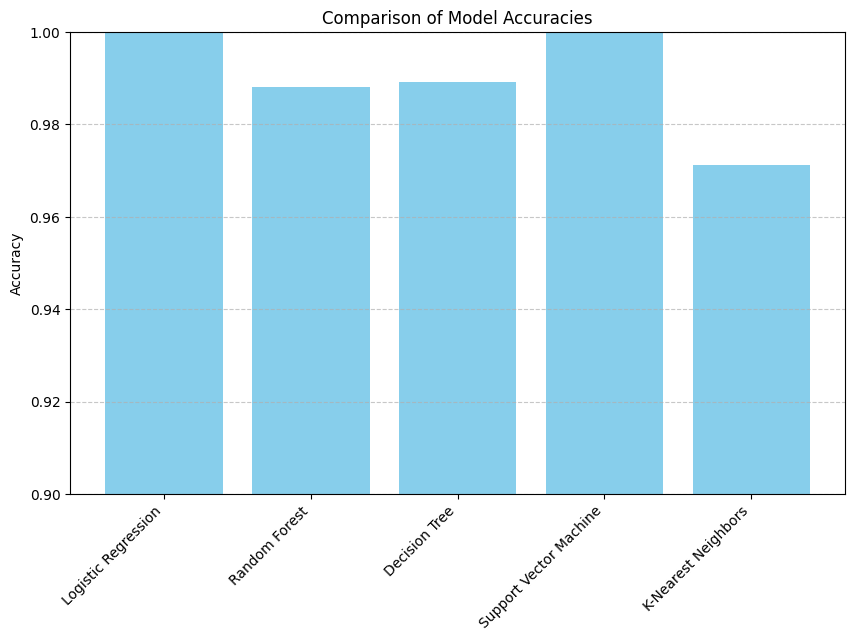

In [11]:
# Import the plotting library
import matplotlib.pyplot as plt

# Create a bar chart to compare model accuracies
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')

# Add title and labels
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)  # Set the y-axis range to highlight differences
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

# Show the plot
plt.show()


In [12]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Build the Neural Network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
nn_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train_scaled, y_train,
                       validation_data=(X_test_scaled, y_test),
                       epochs=50,
                       batch_size=32,
                       verbose=1)

# Evaluate the model
nn_test_loss, nn_test_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Neural Network Test Accuracy: {nn_test_accuracy:.4f}")
print(f"Neural Network Test Loss: {nn_test_loss:.4f}")


Epoch 1/50


c:\Users\Ahmed Mohamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8881 - loss: 0.3560 - val_accuracy: 0.9970 - val_loss: 0.0629
Epoch 2/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9990 - loss: 0.0458 - val_accuracy: 1.0000 - val_loss: 0.0213
Epoch 3/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0144 - val_accuracy: 1.0000 - val_loss: 0.0084
Epoch 4/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0061 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 5/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 6/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.2760e-04 - val_accuracy: 1.0000 - 

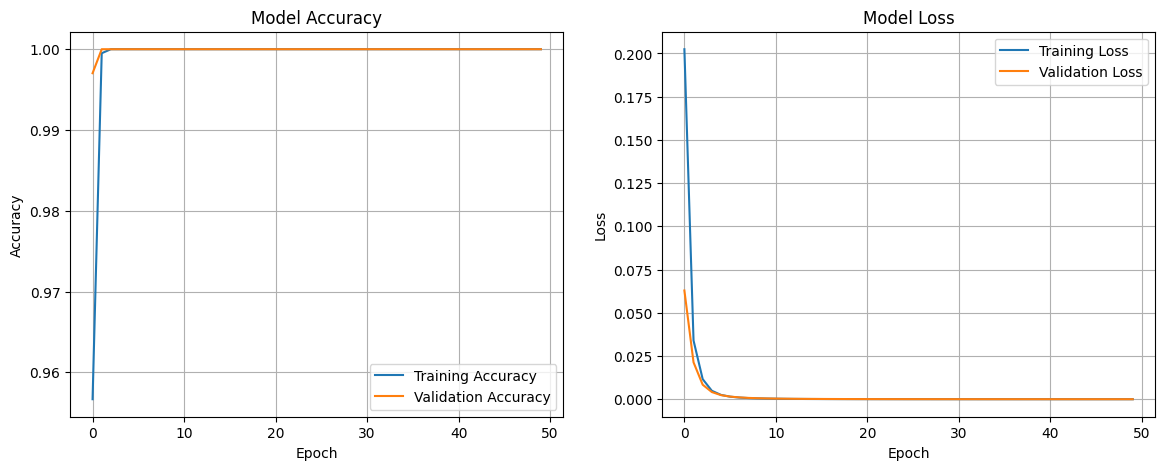

In [13]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


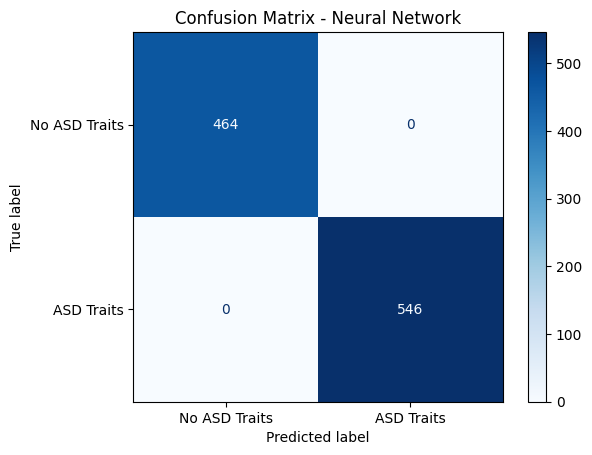

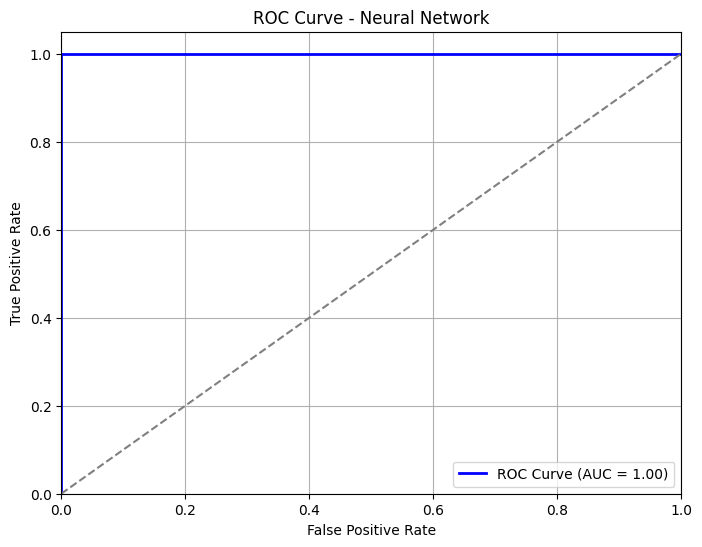

In [14]:
# Import libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for ROC curve
y_pred_prob = nn_model.predict(X_test_scaled)

# Predict classes for confusion matrix
y_pred_class = (y_pred_prob > 0.5).astype("int32")

# 1. Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No ASD Traits", "ASD Traits"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Neural Network')
plt.grid(False)
plt.show()

# 2. Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [15]:
# # Save the trained Neural Network model
# nn_model.save('autism_nn_model.h5')


In [17]:
# Prepare features
X = df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
        'age', 'gender', 'family_mem_with_ASD', 'who_completed_the_test']]
y = df['class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# ✨ Combine model and scaler in one dictionary
model_package = {
    'model': logistic_model,
    'scaler': scaler
}

# Save the combined package into one file
joblib.dump(model_package, 'autism_combined_model.pkl')

print("✅ Combined Model and Scaler saved successfully into 'autism_combined_model.pkl'")


✅ Combined Model and Scaler saved successfully into 'autism_combined_model.pkl'


In [21]:
# Load the combined model
package = joblib.load('autism_combined_model.pkl')

# Extract model and scaler
model = package['model']
scaler = package['scaler']

# Example user input
user_input = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 24, 1, 0, 0]]

# Scale the input
user_input_scaled = scaler.transform(user_input)

# Predict
prediction = model.predict(user_input_scaled)

print(f"Prediction: {prediction}")


Prediction: [1]


c:\Users\Ahmed Mohamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
